In [1]:
import pandas as pd
import os
import folium
import map_functions

In [2]:
ROOT = "C:/Users/Beau/Documents/GitHub/RealEstate"
RAW = os.path.join(ROOT, "data", "raw")
SERIALIZED = os.path.join(ROOT, "data", "serialized")
CLEANED = os.path.join(ROOT, "data", "processed")

In [3]:
# serialize data
# path = os.path.join(RAW, "Mural_Registry.csv")
# df = pd.read_csv(path)
# df.to_pickle(os.path.join(SERIALIZED, "Mural_Registry.pkl"))

In [4]:
df_murals = pd.read_pickle(os.path.join(SERIALIZED, "Mural_Registry.pkl"))

In [5]:
df_murals["Restored"] = df_murals["Year Restored"].notnull().astype(int)

In [6]:
# filter unnecessary rows
df_murals.head()

,Mural Registration ID,Artist Credit,Artwork Title,Media,Year Installed,Year Restored,Location Description,Street Address,Zip,Ward,Affiliated (or Commissioning) Organization,Description of Artwork,Community Areas,Latitude,Longitude,Location,Restored
0,19233,Matthew Hoffman,You Are Beautiful,NaN,2016.0,NaN,NaN,1039 W Lawrence Ave,60640,46,NaN,NaN,3,41.968959,-87.656367,POINT (-87.65636687 41.96895857),0
1,19250,Tony Passero,Toro Totem,Paint,2017.0,NaN,NaN,3176 N Kedzie Ave,60618,33,NaN,NaN,NaN,41.939313,-87.707844,POINT (-87.70784365 41.93931332),0
2,19350,"Darius Dennis, Robin Alcantara, Jared Diaz, Ep...",I Am A Man,NaN,2020.0,NaN,Northeast facing back wall,1379 N Wolcott Ave,60622,1,NaN,NaN,NaN,41.906860,-87.673088,POINT (-87.673088 41.90686),0
3,19225,Sam Kirk,Viva Fï¿½tbol!,Paint,2017.0,NaN,18th and Ashland,1724 S Ashland Ave,60608,25,NaN,Commission with Major League Soccer for 2017 A...,31,41.857898,-87.666290,POINT (-87.66628976 41.85789813),0
4,19340,Christian Paz,Lakefront,NaN,2020.0,NaN,Spoil Me Salon,1137 W Leland Ave,60640,46,NaN,NaN,NaN,41.967100,-87.658980,POINT (-87.65898 41.9671),0


In [7]:
# drop unnecessary rows
df_murals.drop([
    "Mural Registration ID", 
    "Media", 
    "Year Restored", 
    "Affiliated (or Commissioning) Organization", 
    "Location"
], axis=1, inplace=True)

<AxesSubplot:>

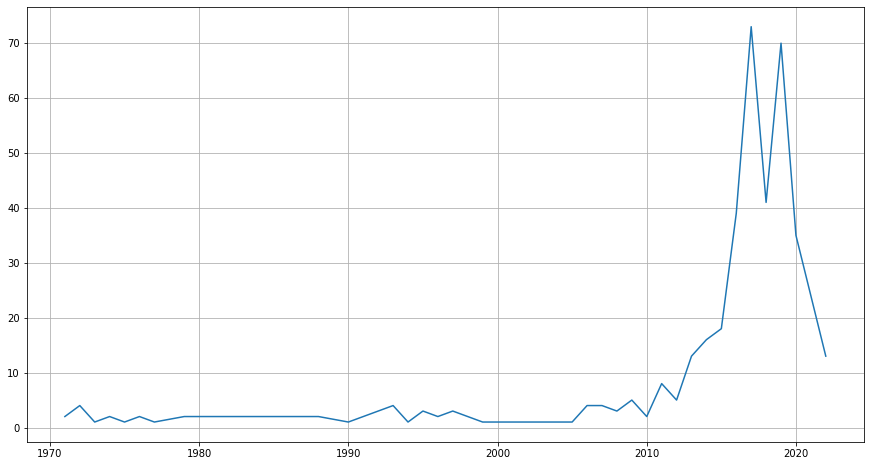

In [8]:
df_murals["Year Installed"].value_counts().sort_index().plot(figsize=(15,8), grid=True)

In [9]:
# Create a Map instance for Chicago
m = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

for idx, row in df_murals.iterrows():
    map_functions.add_map_marker(m, row.Latitude, row.Longitude, row["Artwork Title"])
    # map_functions.add_map_circle(row.Latitude, row.Longitude)

# Change the map style
# m.add_tile_layer(tiles='Stamen Toner', name='Stamen Toner')

# Display the map
m

In [10]:
df_murals.columns = [col.upper() for col in df_murals.columns]
df_murals.to_pickle(os.path.join(CLEANED, "Murals.pkl"))